# Create and fit a new model

## Define model

Let's create a new model. First we import solver interface:

In [1]:
import numpy as np
from scifit.interfaces.generic import FitSolverInterface

Pretend we want to fit someting like:

$$y = a \cdot x + \sqrt{b \cdot x^2 + \pi} + \exp (-c \cdot x) + d$$

Probably not the best problem formulation but insighful for an example. In goes as follows:

In [2]:
class MyModel(FitSolverInterface):
    @staticmethod
    def model(x, a, b, c, d):
        return a * x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + np.exp(-c * x[:, 0]) + d

Instantiate the new solver:

In [3]:
solver = MyModel()

## Load data

Now we generate some synthetic dataset for a given problem:

In [4]:
X = solver.feature_dataset(xmin=-5.0, xmax=15.0, dimension=1, resolution=100)

In [5]:
p = np.array([1.38, 2.21, 0.81, -4.67])

In [6]:
t = solver.target_dataset(X, parameters=p, sigma=0.075, scale_mode="auto", seed=1234, full_output=True)

In [7]:
y = t["y"]
sy = t["sy"]

## Solve Fit

Everything is setup, we can solve our problem:

In [8]:
solution = solver.fit(X, y, sigma=sy)

4
{}


C:\Users\developer\AppData\Local\Temp\ipykernel_8996\3029776148.py:4: RuntimeWarning: invalid value encountered in sqrt
  return a * x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + np.exp(-c * x[:, 0]) + d
C:\Users\developer\AppData\Local\Temp\ipykernel_8996\3029776148.py:4: RuntimeWarning: overflow encountered in exp
  return a * x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + np.exp(-c * x[:, 0]) + d


In [9]:
solver.solved()

True

In [10]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [11]:
print(solution["parameters"])

[ 1.45767296  1.91801321  0.81351517 -4.41465325]


In [12]:
print(np.diag(solution["covariance"]))

[2.53072542e-02 2.50464355e-01 7.28825878e-05 1.60966656e-01]


As we can see, parameters suffer high variances probably due to problem formulation and noise intensity.

## Render solution

Finally we can render fit and loss function to check the dynamic:

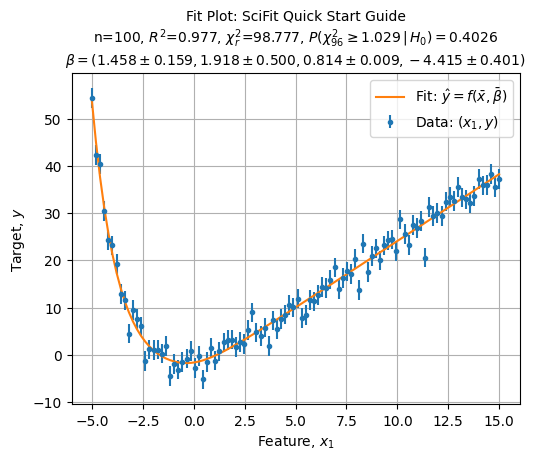

In [13]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

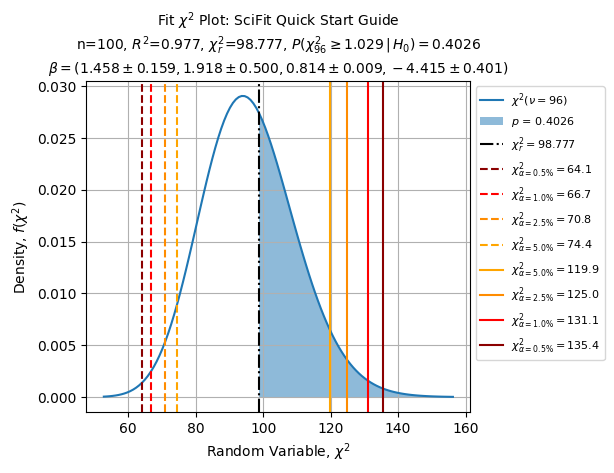

In [14]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

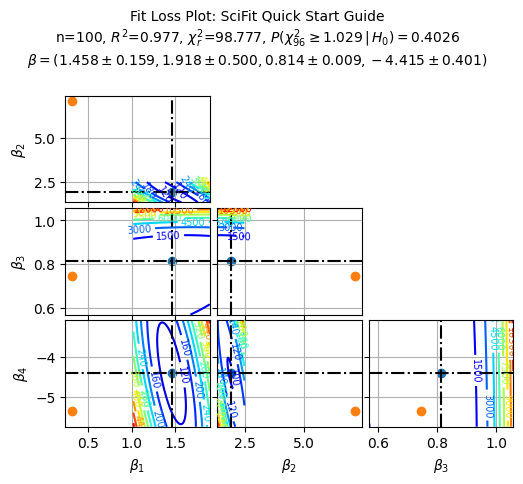

In [15]:
axe = solver.plot_loss(title="SciFit Quick Start Guide")

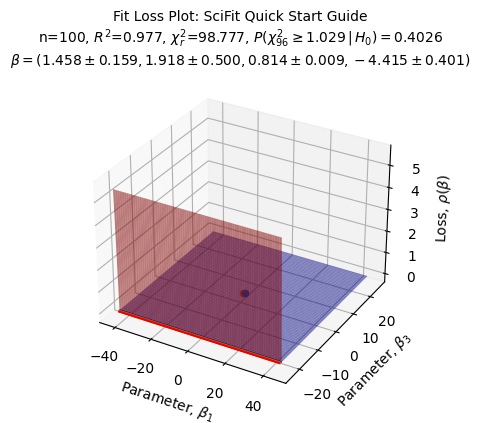

In [16]:
axe = solver.plot_loss_low_dimension(title="SciFit Quick Start Guide", surface=True, first_index=0, second_index=2)

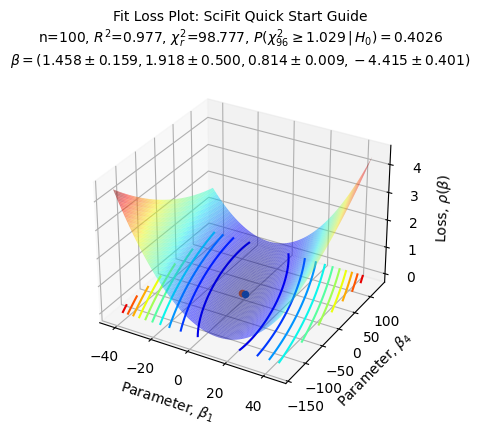

In [17]:
axe = solver.plot_loss_low_dimension(title="SciFit Quick Start Guide", surface=True, first_index=0, second_index=3)